Homework 7

What we are doing here is very similar to homework 6, but now we'll look a bit at scipy.

Do parts 1 and 2.  Part 3 is optional

1. Take what you did on homework 5 as a starting point (using any of the provided datasets).  Replace the regression calculation using least squares with a curve fitting approach (examples in the reading).  To start, just fit a linear equation.  Output the equation to the console.  You don't need to graph anything (we'll look at that in a couple more weeks).
2. Again, using timeit, compare the performance of your solution in homework 5 to the scipy function.  Output the results to the console.
3. (Optional)  There are other models that can be fitted to the data we have.  Try to fit other equations, like Gaussian, to the data.  Output the equation to the console.

In [1]:
#Part - Manual Curve Fitting

In [2]:
import csv
import math
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import timeit, functools


def manual_curve_fitting(br,bo):
    def mean(x):
        return sum(x)/len(x)
    
    # Calculating Standard deviation
    def manual_sd(sd_values):
        mean_val = mean(sd_values)
        sd = math.sqrt(sum((i-mean_val)*(i-mean_val) for i in sd_values)/(len(sd_values)-1))
        return sd
    
    # Calculating Correlation
    def correlation(cor_br, cor_bo):
        mean_cor_br = mean(cor_br)
        mean_cor_bo = mean(cor_bo)
    
        sd_a = manual_sd(cor_br)
        sd_b = manual_sd(cor_bo)
        R = []
        for i in range(len(cor_br)):
            R.append(((cor_br[i]-mean_cor_br)*(cor_bo[i]-mean_cor_bo))/(sd_a*sd_b))
        R_correlation = sum(R)/(len(cor_br)-1)
        return R_correlation
    
    
    sd_br = manual_sd(br)
    sd_bo = manual_sd(bo)
    R = correlation(br, bo)
    x = (sd_bo/sd_br)*R
    y = mean(bo) - x*mean(br)
        
    return(x,y)


In [3]:
#Part - Scipy Curve Fitting

In [4]:
def func(br, a, b):
    return(a*br+b)

def scipy_curve_fitting(br, bo):
    fitParams, fitCov = curve_fit(func, br, bo)

    return fitParams, fitCov

In [5]:
def gauss_func(x, a, b, c):
    return(a*np.exp(-((x-b)**2)/(2*c**2)))

def gaussian_curve_fitting():
   
    x = np.linspace(0, 10, 100)
    y = gauss_func(x, 1, 5, 2)
    fitParams, fitCov = curve_fit(gauss_func, x, y)
    return fitParams, fitCov, x

In [6]:
#Part - Read input file and call functions

Time of Each distribution:
Manual Curve Fitting: 0.0475341
Scipy Curve Fitting: 0.1679866
Gauss Curve Fitting: 0.1541706

Fit Coefficients:
 [  0.90291295 -56.85554543]

Covariance Matrix:
 [[  1.98267798e-03  -5.61364161e-01]
 [ -5.61364161e-01   1.84711327e+03]]


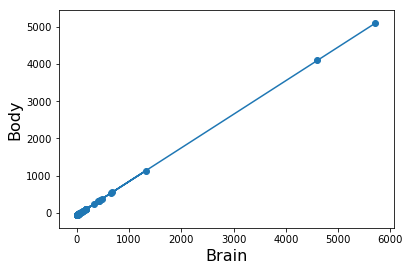

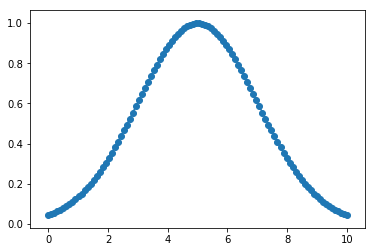

In [7]:
brain_body = open("data\/brainandbody.csv", "r")
reader = csv.reader(brain_body)
br = []
bo = []
row_num = 0

try:
    for brbo in reader:
        if row_num == 0:
            header = brbo
            row_num += 1
        else:
            br.append(float(brbo[2]))
            bo.append(float(brbo[1]))
except Exception as error:
    print("Error in input file")

br = np.array(br)
bo = np.array(bo)

#Timeit
n= 100

print("Time of Each distribution:")
print("Manual Curve Fitting:", timeit.Timer(functools.partial(manual_curve_fitting,br,bo)).timeit(number=n))
print("Scipy Curve Fitting:", timeit.Timer(functools.partial(scipy_curve_fitting,br,bo)).timeit(number=n))
fitParams, fitCov = scipy_curve_fitting(br,bo)

print("Gauss Curve Fitting:", timeit.Timer(functools.partial(gaussian_curve_fitting)).timeit(number=n))
fitParams1, fitCov1, x = gaussian_curve_fitting()

print("\nFit Coefficients:\n", fitParams)
print("\nCovariance Matrix:\n", fitCov)

plt.xlabel('Brain', fontsize = 16)
plt.ylabel('Body', fontsize = 16)
plt.plot(br,func(br, fitParams[0], fitParams[1]))
plt.scatter(br,func(br, fitParams[0], fitParams[1]))
plt.show()

#Gauss
plt.plot(x,gauss_func(x, fitParams1[0], fitParams1[1], fitParams1[2]))
plt.scatter(x,gauss_func(x, fitParams1[0], fitParams1[1], fitParams1[2]))
plt.show()